In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200528_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200528_P60

## Si II 6355

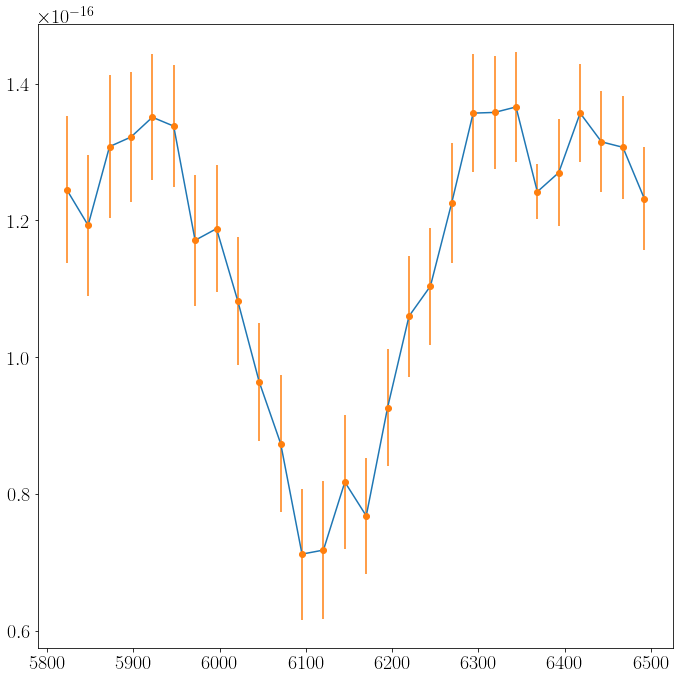

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

20 points within 5900.00 and 6400.00 angstroms.


../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


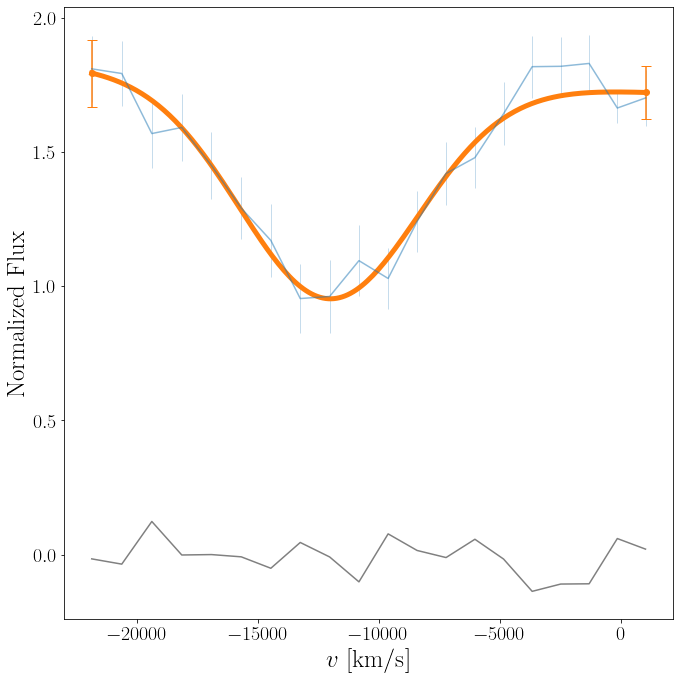

LS estimation:
Velocity pvf: -11508 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

  0%|          | 0/50000 [00:00<?, ?it/s]

Normalize factor = 0.606


  6%|▌         | 3000/50000 [01:32<24:06, 32.49it/s]  


MCMC results:
Velocity pvf: -11391 pm 195 km/s


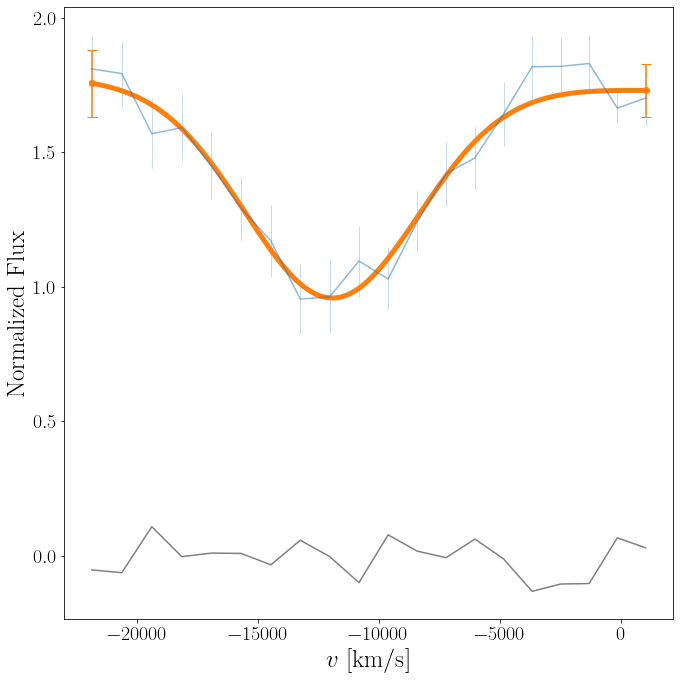

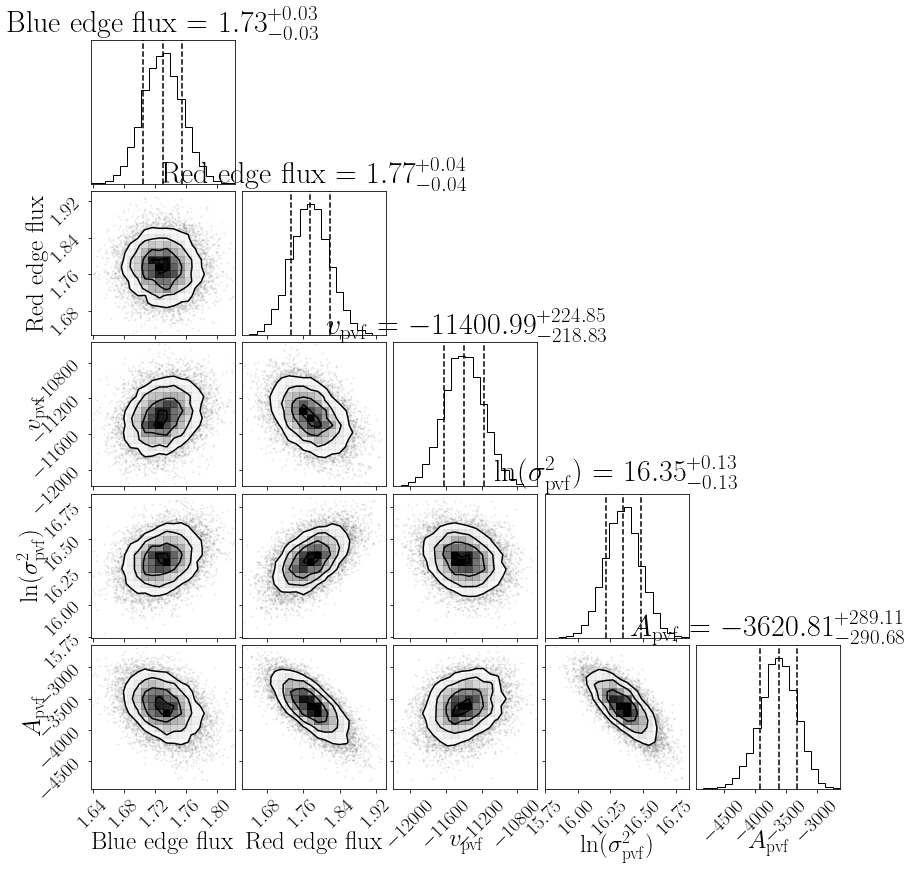

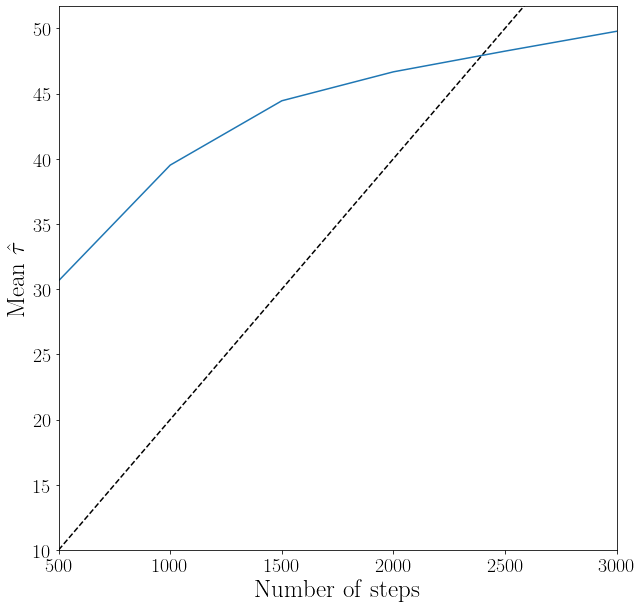

In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

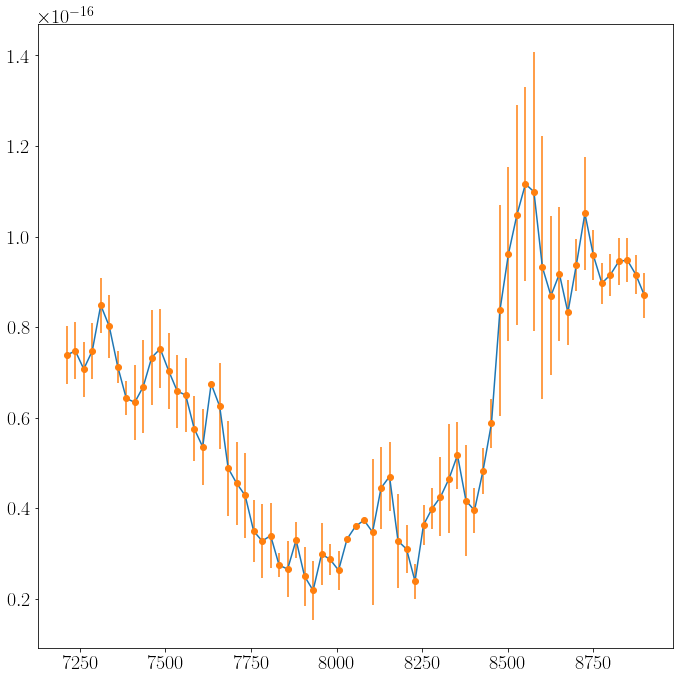

In [7]:
Spec1.plot_line_region(7200, 8900)

In [13]:
Spec1.add_line('CaII_IRT', 7250, 8900, lines=[8498.018, 8542.089, 8662.140])

67 points within 7250.00 and 8900.00 angstroms.


../absorption_line_vel.py:347: UserWarning: Some flux with extremely low uncertainty!
  warnings.warn("Some flux with extremely low uncertainty!")
../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


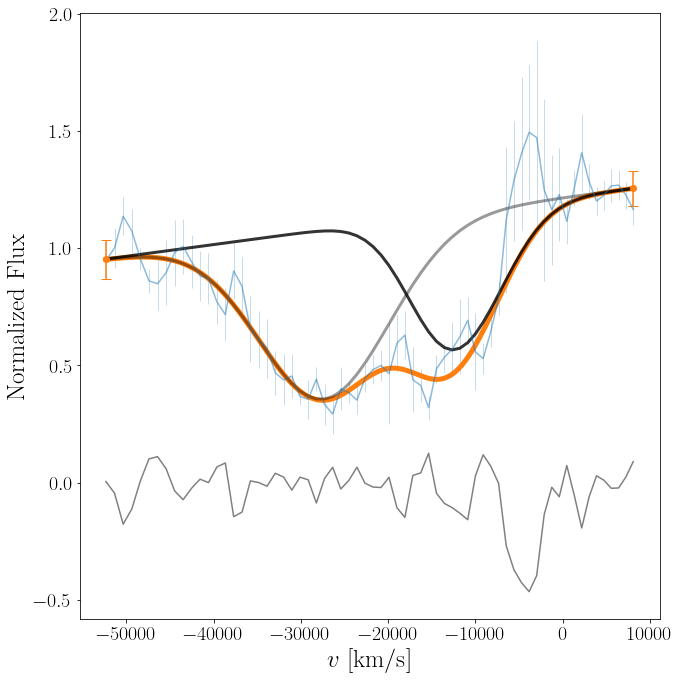

LS estimation:
Velocity pvf: -8828 km/s
Velocity hvf: -23952 km/s


In [14]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Normalize factor = 0.910


  0%|          | 4/50000 [00:00<25:05, 33.21it/s]

MCMC results:
Velocity pvf: -8803 pm 432 km/s
Velocity hvf: -23883 pm 590 km/s
Normalize factor = 0.910


 11%|█         | 5500/50000 [02:33<20:42, 35.80it/s]  


MCMC results:
Velocity pvf: -8467 pm 390 km/s
Velocity hvf: -23608 pm 588 km/s


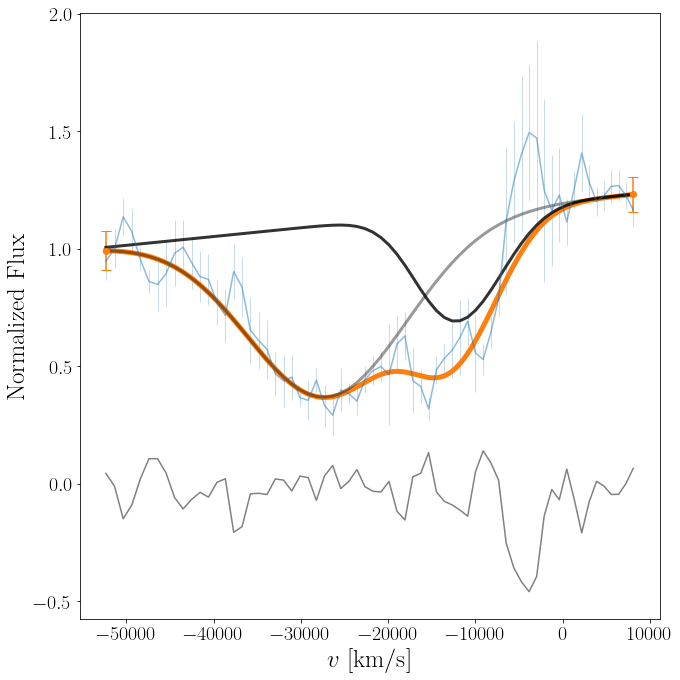

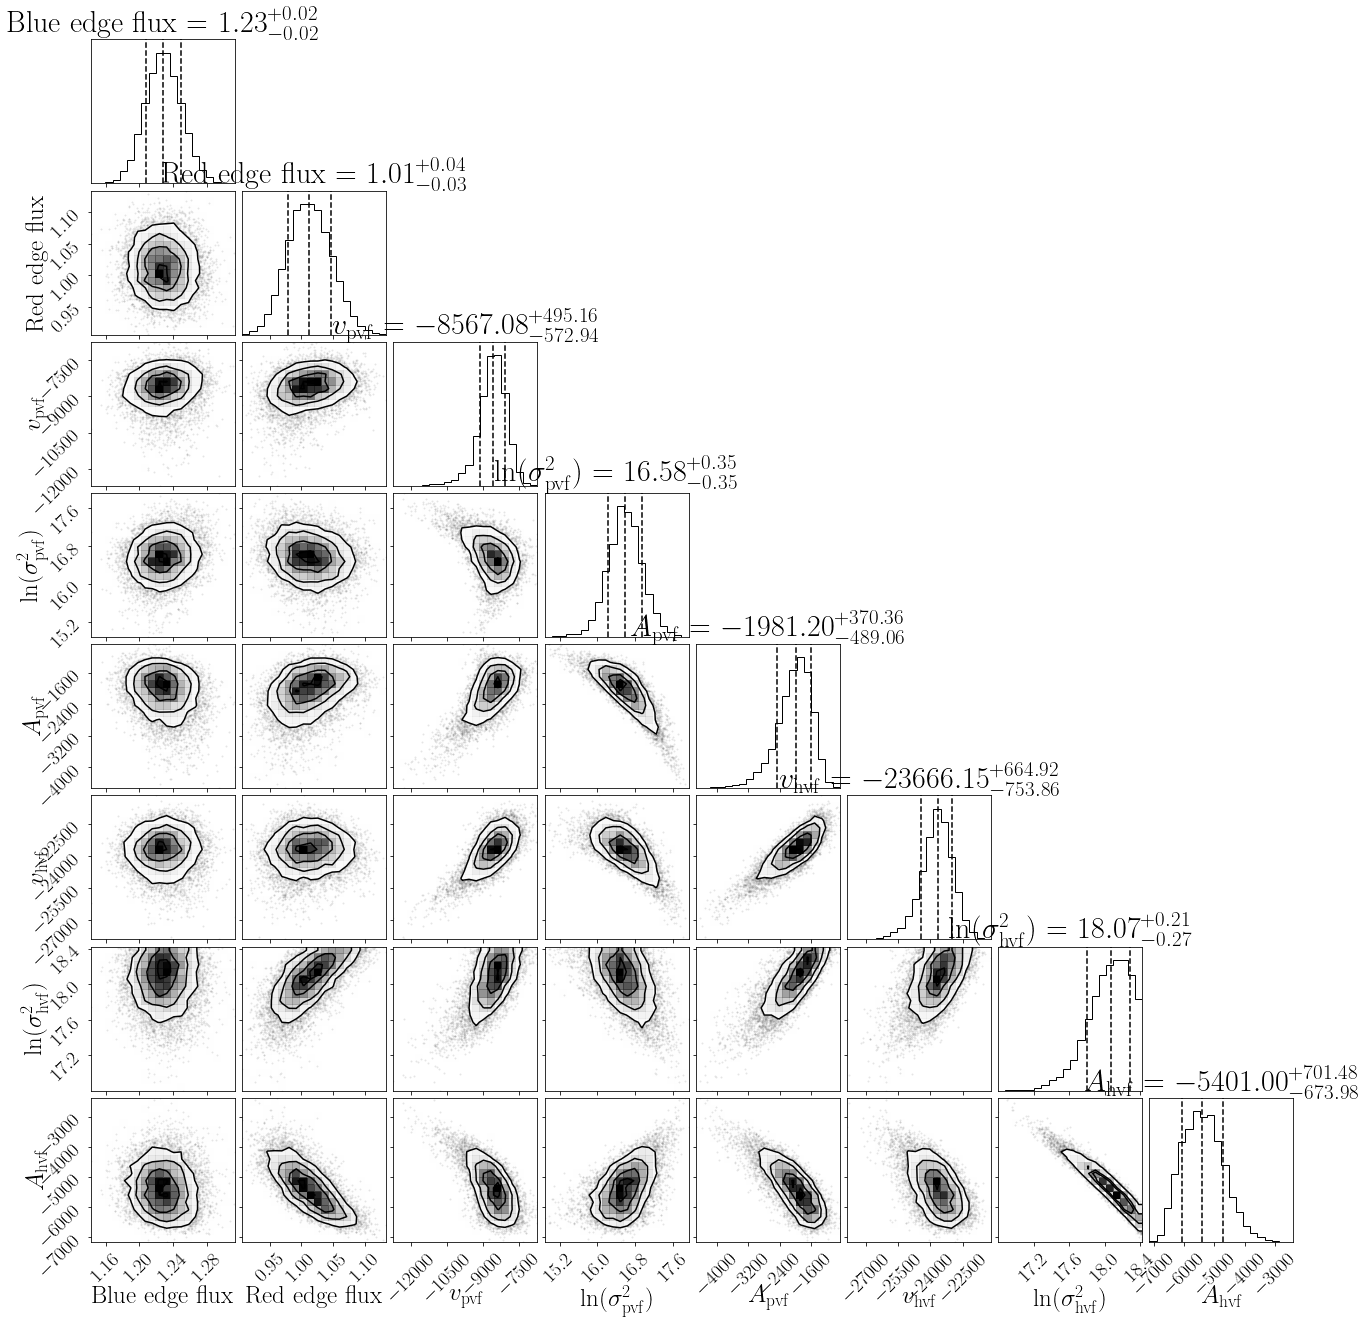

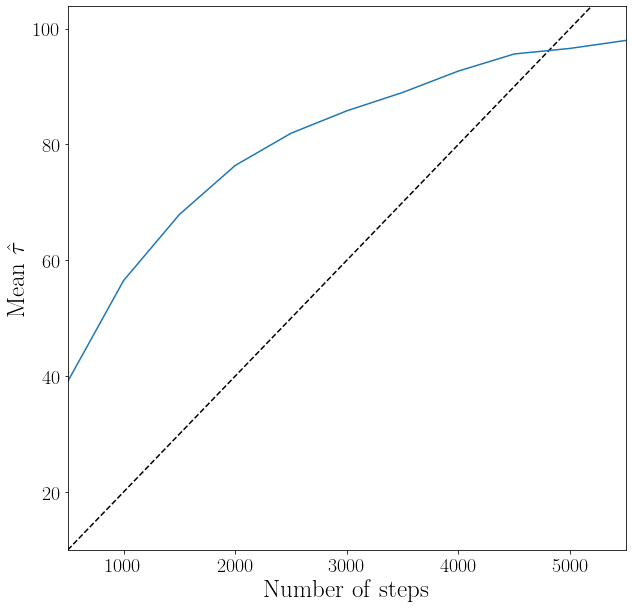

In [15]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = 2e3**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)